# Necessary Libraries

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# Import Dataset

In [2]:
TRAIN_DATA_PATH = 'D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Skin Lesion Classification Deep Learning/Binary_Class_Challenge/Dataset/train'
TEST_DATA_PATH  = "D:/Erasmus Mundus Masters/University of Girona/Computer Aided Diagnosis/Skin Lesion Classification Deep Learning/Binary_Class_Challenge/Dataset/val"

IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

BATCH_SIZE = 16
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting the data into training and validation (80% - training, 20% - validation)
)


# Define image data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  


# Creating the train generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Specify your target image dimensions
    batch_size=BATCH_SIZE,  # Define your batch size
    class_mode='binary',  # Depending on your problem (binary classification in this case)
    subset='training'  # Set the subset as 'training' for the train generator
)

# Creating the validation generator
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Specify your target image dimensions
    batch_size=BATCH_SIZE,  # Define your batch size
    class_mode='binary',  # Depending on your problem (binary classification in this case)
    subset='validation'  # Set the subset as 'validation' for the validation generator
)



# Create a test generator using flow_from_directory
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Set your target size for the images
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Set the class mode according to your classification task
    shuffle=False  # Set to False if you want to predict in the order of the files
)


Found 12156 images belonging to 2 classes.
Found 3039 images belonging to 2 classes.
Found 3796 images belonging to 2 classes.


# Hyper Parameter

In [8]:
# Assuming you have defined these variables somewhere in your code
learning_rate = 1e-4  
epoch         = 20 
decay_rate    = 1e-8 

# VGG16

In [16]:
# Load pre-trained VGG16 model without the top layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Freeze layers in VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Create the Adam optimizer
adam = Adam(learning_rate=learning_rate, weight_decay=decay_rate)

# Compile the model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Define a function for exponential decay of the learning rate
def exponential_decay(epoch, learning_rate):
    new_learning_rate = learning_rate * np.exp(-decay_rate * epoch)
    return new_learning_rate

# Define learning rate scheduler
learning_rate_scheduler   = LearningRateScheduler(exponential_decay, verbose=1)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the callback list
call_back_list = [early_stopping, learning_rate_scheduler]

# Train the model with early stopping and learning rate scheduler
history = model.fit(
    train_generator,
    steps_per_epoch  = train_generator.samples // BATCH_SIZE,
    epochs           = epoch,
    validation_data  = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    callbacks        = call_back_list
)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
759/759 [==============================] - 4845s 6s/step - loss: 0.5705 - accuracy: 0.7095 - val_loss: 0.4875 - val_accuracy: 0.7682 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999647378753e-05.
Epoch 2/20
759/759 [==============================] - 3966s 5s/step - loss: 0.5179 - accuracy: 0.7473 - val_loss: 0.4349 - val_accuracy: 0.8039 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999547378759e-05.
Epoch 3/20
759/759 [==============================] - 3635s 5s/step - loss: 0.4897 - accuracy: 0.7670 - val_loss: 0.4689 - val_accuracy: 0.7844 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999447378764e-05.
Epoch 4/20
759/759 [==============================] - 5363s 7s/step - loss: 0.4771 - accuracy: 0.7680 - val_loss: 0.4397 - val_accuracy: 0.8056 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler sett

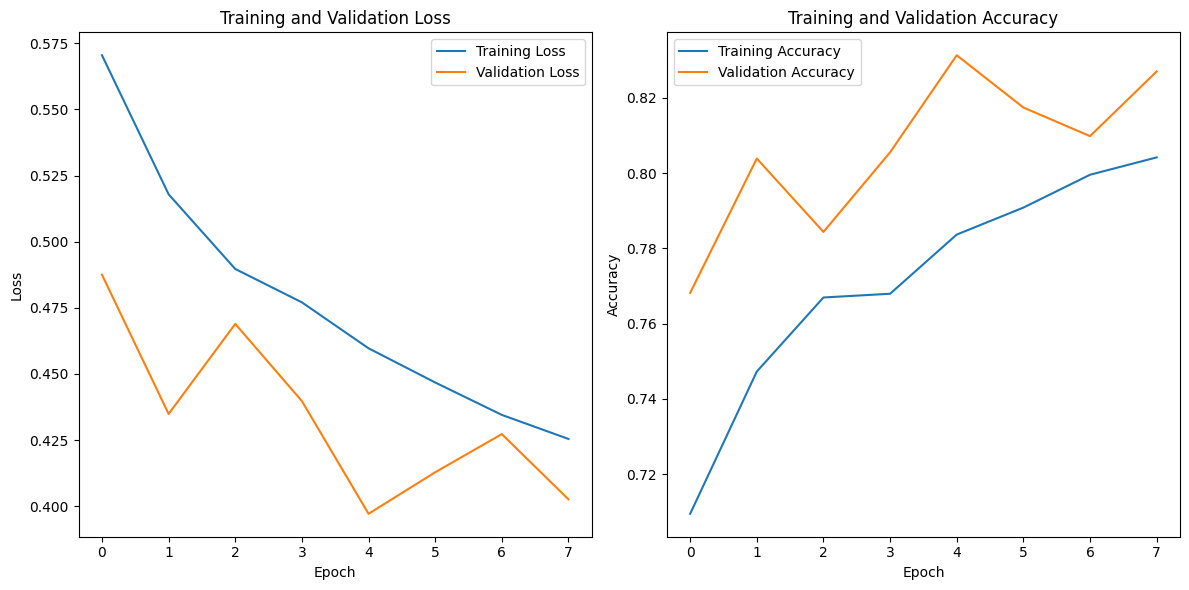

In [17]:
# Retrieve training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


238/238 [==============================] - 700s 3s/step
Accuracy: 78.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1931
           1       0.81      0.74      0.77      1865

    accuracy                           0.78      3796
   macro avg       0.79      0.78      0.78      3796
weighted avg       0.79      0.78      0.78      3796

Confusion Matrix:
[[1597  334]
 [ 484 1381]]
AUC Score: 0.8695


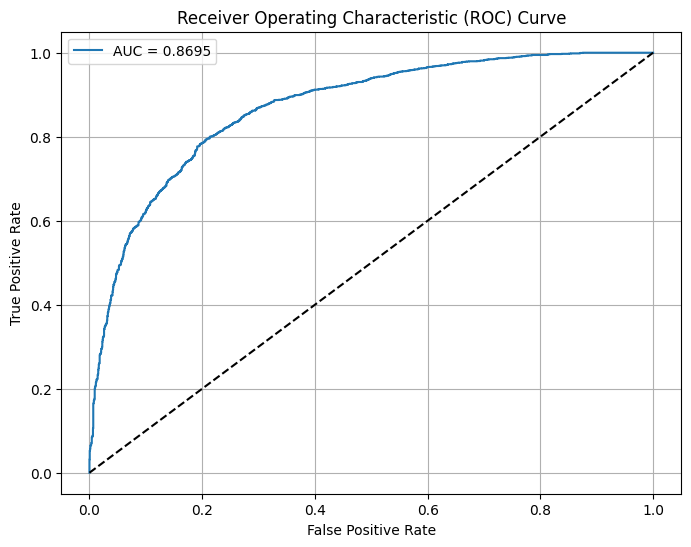

In [18]:
# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = np.round(predictions).flatten()

# Get true labels from the test generator
true_labels = test_generator.classes

# Compute accuracy
accuracy = np.mean(binary_predictions == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_report = classification_report(true_labels, binary_predictions)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
auc_score = roc_auc_score(true_labels, predictions)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
